# GHRSST Level 4 AVHRR_OI Global Blended Sea Surface Temperature Analysis (GDS2) from NCEI

NASA Physical Oceanography Distributed Active Archive Center (PO.DAAC) (<podaac@podaac.jpl.nasa.gov>)

Jet Propulsion Laboratory, California Institute of Technology

<img src="https://podaac.jpl.nasa.gov/sites/default/files/image/custom_thumbs/podaac_logo.png" alt="Drawing" style="width: 100px;"/>


(Run this notebook in AWS US-WEST-2 to list all POCLOUD datasets)


This tutorial only works in a jupyterhub hosted at AWS US-WEST-2.


<img src="https://podaac.jpl.nasa.gov/Podaac/thumbnails/AVHRR_OI-NCEI-L4-GLOB-v2.1.jpg" alt="Drawing" style="width: 300px;"/>


# A 4-minute demo of this dataset

## Existing collections in PODAAC CLOUD (AWS S3)

In [4]:
import utils
import pprint
import xarray as xr
from datetime import datetime
import warnings

warnings.simplefilter(action='ignore')

In [5]:
s3=utils.direct_s3()
podaac_s3='podaac-ops-cumulus-protected'
collections=s3.glob("podaac-ops-cumulus-protected/*")

#395 total collections in PODAAC CLOUD (POCLOUD) by 03/25/2022.
print(len(collections), "total collections in PODAAC CLOUD (POCLOUD) by %s."%datetime.today().strftime('%m/%d/%Y'))

405 total collections in PODAAC CLOUD (POCLOUD) by 04/14/2022.


In [6]:
wind_data=utils.find_dataset(keywords=['AVHRR'])

display(wind_data)

,short_name,long_name,concept_id,time_start,time_end
0,AVHRR_OI-NCEI-L4-GLOB-v2.1,GHRSST Level 4 AVHRR_OI Global Blended Sea Sur...,C2036881712-POCLOUD,1981-09-01T00:00:00.000Z,[NaT/Present]
1,AVHRR19_G-NAVO-L2P-v1.0,GHRSST Level 2P Global 1m Sea Surface Temperat...,C2036880640-POCLOUD,2013-09-24T11:31:01.000Z,2021-01-06T23:00:00.000Z
2,AVHRR19_L-NAVO-L2P-v1.0,GHRSST Level 2P Regional 1m Sea Surface Temper...,C2036877716-POCLOUD,2013-05-05T15:07:20.000Z,2021-01-16T23:59:00.000Z
3,AVHRRMTA_G-NAVO-L2P-v1.0,GHRSST Level 2P Global 1m Sea Surface Temperat...,C2205618215-POCLOUD,2013-09-24T12:09:00.000Z,2020-07-07T00:00:00.000Z
4,AVHRRMTA_G-NAVO-L2P-v2.0,GHRSST Level 2P Global Sea Surface Temperature...,C2036877495-POCLOUD,2020-06-29T04:46:08.000Z,[NaT/Present]
5,AVHRRMTB_G-NAVO-L2P-v1.0,GHRSST Level 2P Global 1m Sea Surface Temperat...,C2205618339-POCLOUD,2013-09-24T12:09:00.000Z,2020-06-22T15:10:55.000Z
6,AVHRRMTB_G-NAVO-L2P-v2.0,GHRSST Level 2P Global Sea Surface Temperature...,C2036877502-POCLOUD,2020-06-22T12:09:00.000Z,[NaT/Present]
7,AVHRRMTC_G-NAVO-L2P-v2.0,GHRSST Level 2P Global Sea Surface Temperature...,C2036877509-POCLOUD,2020-06-10T11:52:20.000Z,[NaT/Present]
8,AVHRR_SST_METOP_B-OSISAF-L2P-v1.0,GHRSST Level 2P sub-skin Sea Surface Temperatu...,C2036880717-POCLOUD,2016-01-19T08:07:03.000Z,[NaT/Present]
9,AVHRR_SST_METOP_B_GLB-OSISAF-L3C-v1.0,GHRSST L3C global sub-skin Sea Surface Tempera...,C2036877693-POCLOUD,2016-01-06T17:58:00.000Z,[NaT/Present]


The first column in the text shows the __short_name__, which is also the _folder_ name in the cloud storage (__a bucket__ in the AWS jargon). 

<div class="alert alert-block alert-warning">
Caveat: The utils.py module in this folder is ad hoc. It is not an official PODAAC tool and subject to change in the future. It has a couple of routines that use the core functions offered by NASA Earthdata. It is designed to provide a simpler interface for science users, who are not required to know these core functions in order to analyzing data in the cloud. But users are encouraged to dive deeper if interested. More learning materials can be found on <a href="https://openscapes.org">OpenScapes</a> website and <a href="https://github.com/podaac"> PODAAC github page </a>.
</div>

## Dive into one example 

Let's take a look at one example. I am using [AVHRR_OI-NCEI-L4-GLOB-v2.1](https://podaac.jpl.nasa.gov/dataset/AVHRR_OI-NCEI-L4-GLOB-v2.1). 

The full path within AWS S3 from this example is 
```podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20160101120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc```

* __podaac-ops-cumulus-protected__ is the _root_ folder for all PODAAC data within AWS S3. It is often referred to as 'bucket'. 
* __OSCAR_L4_OC_FINAL_V2.0__ is an unique __short_name__ for this particular dataset.
* __oscar_currents_final_19930101.nc__ is an L2 file, often refered to as __granule__. 


In [7]:
short_name="AVHRR_OI-NCEI-L4-GLOB-v2.1"
fns=sorted(s3.glob(podaac_s3+'/%s/*nc'%short_name))
print('There are %i files in this dataset.'%len(fns))
print('The first five files are:')
pprint.pprint(fns[:5])
print('The last five files are:')
pprint.pprint(fns[-5:])

There are 2293 files in this dataset.
The first five files are:
['podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20160101120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc',
 'podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20160102120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc',
 'podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20160103120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc',
 'podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20160104120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc',
 'podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20160105120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc']
The last five files are:
['podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20220408120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc',
 'podaac-ops-cumulus-protected/AVHRR_OI-NCEI-L4-GLOB-v2.1/20220409120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc',
 'podaac

## Open and plot
Let's open one example and plot it. 

In [20]:
fns=sorted(s3.glob(podaac_s3+'/%s/*20160[1-2]*.nc'%short_name))
#fns+=sorted(s3.glob(podaac_s3+'/%s/*2008*.nc'%short_name))

data=xr.open_mfdataset([s3.open(fn) for fn in fns[:]],decode_times=False)
data

<xarray.Dataset>
Dimensions:           (lat: 720, lon: 1440, nv: 2, time: 60)
Coordinates:
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time              (time) int64 1104451200 1104537600 ... 1109548800
Dimensions without coordinates: nv
Data variables:
    lat_bnds          (time, lat, nv) float32 dask.array<chunksize=(1, 720, 2), meta=np.ndarray>
    lon_bnds          (time, lon, nv) float32 dask.array<chunksize=(1, 1440, 2), meta=np.ndarray>
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.6, ACDD-1.3
    title:                      NOAA/NCEI 1/4 Degree Daily Optimum Interpolat...
    id:                         NCEI-L4LRblend-GLOB-AVHRR_OI
    references:                 Reynolds, et al.(2009) What is New in Version...
    institution:                NOAA/NESDIS/NCEI
    creator_name:               NCEI Products and Services
    ...                         ...
    Metadata_Link.:             http://doi.org/10.7289/V5SQ8XB5
    keywords:                   Oceans>Ocean Temperature>Sea Surface Temperature
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   CF Standard Name Table v29
    processing_level:           L4
    cdm_data_type:              Grid

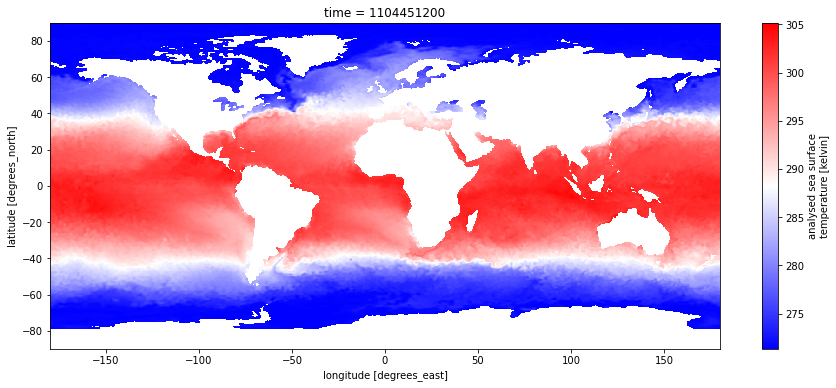

In [21]:
from matplotlib import pylab as plt

#open multiple files
fig,ax=plt.subplots(1,1,figsize=(15,6))

data['analysed_sst'][0,...].plot(ax=ax,cmap=plt.cm.bwr)

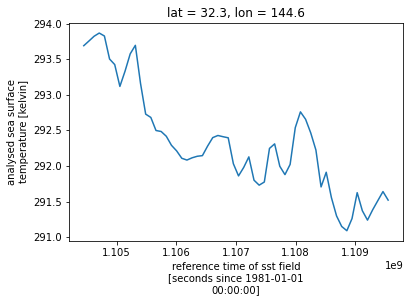

In [22]:
data['analysed_sst'].interp(lat=32.3,lon=144.6).plot()